# Multiple Linear Regression (MLR)

MLR tries to predict the output ($\hat{y}$) using a set of features ($w_1$, $w_2$, $w_3$, \ldots, $w_d$), as:

$\hat{y} = b_0 + w_1x_1 + w_2x_2 + w_3x_3 + w_dx_d$

where $b_0$ is the bias ($x=0$), $w_1$ is the parameter of $x_1$, $w_2$ is the parameter of $x_2$ and so on. Using matrix representation, we have:

$$ X = [x_1, x_2, \ldots, x_d] \hspace{20pt} W = \begin{bmatrix}
w_1 \\
w_2 \\
w_3 \\
\ldots \\
w_n
\end{bmatrix} $$

Then,

$$\hat{y} = XW + b$$


In [1]:
%matplotlib inline
import torch
from matplotlib import pyplot as plt

In [3]:
w = torch.tensor([[2.0],[3.0]], requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)

def forward(x):
    y = torch.mm(x, w) + b
    return y

x = torch.tensor([[1.0, 2.0]])
yhat = forward(x)
print(yhat)

tensor([[9.]], grad_fn=<ThAddBackward>)


# MLR using 2D Tensors

Having several tensors representing a sequence of inputs, we can construct a matrix X as:

$x_1 = [4.9,   3, 1.4, 0.2]$<br>
$x_2 = [4.1,   1, 1.4, 0.2]$<br>
$x_3 = [1.1, 2.1,   3,  -1]$<br>
$x_4 = [4.3, 1.9,   1, 7.9]$

$$X = \begin{bmatrix}
4.9 & 3 & 1.4 & 0.2 \\
4.1 & 1 & 1.4 & 0.2 \\
1.1 & 2.1 & 3 & -1 \\
4.3 & 1.9 & 1 & 7.9 \\
\end{bmatrix} $$


In [6]:
X = torch.tensor([[1.0, 1.0],[1.0,2.0],[1.0,3.0]])
yhat = forward(X)
print(yhat)

tensor([[ 6.],
        [ 9.],
        [12.]], grad_fn=<ThAddBackward>)


# Custom Modules

In [13]:
import torch.nn as nn
from torch.nn import Linear

class LR(nn.Module):
    def __init__(self, in_size, out_size):
        super(LR, self).__init__()
        self.linear = nn.Linear(in_size, out_size)

    def forward(self, x):
        out = self.linear(x)
        return out
    
    
torch.manual_seed(1)
model = LR(in_size=2, out_size=1)
list(model.parameters())

[Parameter containing:
 tensor([[ 0.3643, -0.3121]], requires_grad=True), Parameter containing:
 tensor([-0.1371], requires_grad=True)]

In [14]:
x = torch.tensor([[1.0, 2.0]])
yhat = model(x)
print(yhat)

tensor([[-0.3969]], grad_fn=<ThAddmmBackward>)


In [16]:
X = torch.tensor([[1.0, 1.0], [1.0, 2.0], [1.0, 3.0]])
yhat = model(X)
print(yhat)

tensor([[-0.0848],
        [-0.3969],
        [-0.7090]], grad_fn=<ThAddmmBackward>)


# Multiple Linear Regression Training

Total loss function for multiple linear regression 

$$l(w, b) = \frac{1}{N} \sum_{n=1}^{N}(y_n - x_nw + b)^2$$

If $w$ has two dimensions, then $l(w_1, w_2, b)$. If $w$ has three dimensions, then $l(w_1, w_2, w_3, b)$, and so on. 
In order to train the network, we take the gradient as

$$\nabla l(w, b) = \begin{bmatrix}
\frac{\partial l(w, b)}{\partial w_1} \\
\frac{\partial l(w, b)}{\partial w_2} \\
\vdots \\
\frac{\partial l(w, b)}{\partial w_d} \\
\end{bmatrix}$$

The update term looks like:

$$w^{k+1} = w^{k} - \eta \nabla l(w, b)$$

Which is converted to:

$$
\begin{bmatrix}
w_1^{k+1} \\
w_2^{k+1} \\
\vdots \\
w_d^{k+1} \\
\end{bmatrix} = \begin{bmatrix}
w_1^{k} \\
w_2^{k} \\
\vdots \\
w_d^{k} \\
\end{bmatrix} - \eta \begin{bmatrix}
\frac{\partial l(w^k, b)}{\partial w_1} \\
\frac{\partial l(w^k, b)}{\partial w_2} \\
\vdots \\
\frac{\partial l(w^k, b)}{\partial w_d} \\
\end{bmatrix}
$$

In [17]:
class LR(nn.Module):
    def __init__(self, in_size, out_size):
        super(LR, self).__init__()
        self.linear = nn.Linear(in_size, out_size)

    def forward(self, x):
        out = self.linear(x)
        return out

In [35]:
from torch.utils.data import Dataset, DataLoader
from torch import optim

class Data2D(Dataset):
    def __init__(self):
        self.x = torch.zeros(20, 2)
        self.x[:,0] = torch.arange(-1, 1, 0.1)
        self.x[:,1] = torch.arange(-1, 1, 0.1)
        self.w = torch.tensor([[1.0], [1.0]])
        self.b = torch.tensor(1.0)

        self.f = torch.mm(self.x, self.w) + self.b
        self.y = self.f + 0.1*torch.randn((self.x.shape[0], 1))
        self.len = self.x.shape[0]

    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __len__(self):
        return self.len

In [36]:
data_set = Data2D()
criterion = nn.MSELoss()
model = LR(in_size=2, out_size=1)
trainloader = DataLoader(dataset=data_set, batch_size=2)
optimizer = optim.SGD(model.parameters(), lr=0.01)

LOSSES = []
for epoch in range(100):
    for x, y in trainloader:
        yhat = model(x)
        loss = criterion(yhat, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    LOSSES.append(loss)

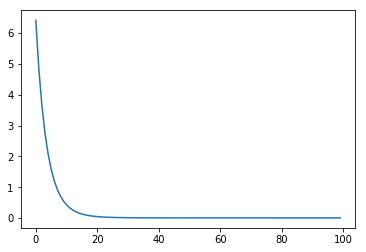

In [38]:
plt.plot(range(100), LOSSES)
plt.show()

# Linear Regression with Multiple Outputs

$\hat{y}_1 = b_{01} + w_{11}x_1 + w_{21}x_2 + w_{31}x_3 + w_{d1}x_d$<br>
$\hat{y}_2 = b_{02} + w_{12}x_1 + w_{22}x_2 + w_{32}x_3 + w_{d2}x_d$<br>

In terms of matrix multiplication, we have

$$ [ \hat{y}_1\ \ \ \hat{y}_2 ] = [x_1, \ldots, x_d ] 
\begin{bmatrix} 
w_{11} & w_{12} \\
\vdots & \vdots \\
w_{d1} & w_{d2} \\
\end{bmatrix} + [ b_{01}\ \ \ b_{02} ]$$

We can generalize this to `m` outputs as

$$ [ \hat{y}_1\ \ \ \hat{y}_2\ \ldots \hat{y}_m ] = [x_1, \ldots, x_d ] 
\begin{bmatrix} 
w_{11} & w_{12} & \ldots & w_{1m} \\
\vdots & \vdots & \ldots & \vdots \\
w_{d1} & w_{d2} & \ldots & w_{dm} \\
\end{bmatrix} + [ b_{01}\ \ \ b_{02}\ \ldots b_{0m} ]$$

In [39]:
class LR(nn.Module):
    def __init__(self, in_size, out_size):
        super(LR, self).__init__()
        self.linear = nn.Linear(in_size, out_size)

    def forward(self, x):
        out = self.linear(x)
        return out

In [40]:
model = LR(2, 2)
list(model.parameters())

[Parameter containing:
 tensor([[-0.2535,  0.0254],
         [-0.3088, -0.2860]], requires_grad=True), Parameter containing:
 tensor([-0.1432, -0.0048], requires_grad=True)]

In [41]:
x = torch.tensor([[1.0, 2.0]])
yhat = model(x)
print(yhat)

tensor([[-0.3459, -0.8856]], grad_fn=<ThAddmmBackward>)


In [43]:
X = torch.tensor([[1.0, 1.0],[1.0, 2.0],[1.0, 3.0]])
yhat = model(X)
print(yhat)

tensor([[-0.3713, -0.5996],
        [-0.3459, -0.8856],
        [-0.3205, -1.1716]], grad_fn=<ThAddmmBackward>)


# Multiple Output Linear Regression Training

For multiple output in linear regression, we compute the loss as:
    
$$l(W, b) = \frac{1}{N} \sum_{n=1}^{N} || y_n - x_nW + b||^2$$

In [45]:
class LR(nn.Module):
    def __init__(self, in_size, out_size):
        super(LR, self).__init__()
        self.linear = nn.Linear(in_size, out_size)

    def forward(self, x):
        out = self.linear(x)
        return out

In [46]:
class Data2D(Dataset):
    def __init__(self):
        self.x = torch.zeros(20, 2)
        self.x[:,0] = torch.arange(-1, 1, 0.1)
        self.x[:,1] = torch.arange(-1, 1, 0.1)
        self.w = torch.tensor([[1.0, -1.0], [1.0, -1.0]])
        self.b = torch.tensor([[1.0, -1.0]])

        self.f = torch.mm(self.x, self.w) + self.b
        self.y = self.f + 0.1*torch.randn((self.x.shape[0], 1))
        self.len = self.x.shape[0]

    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __len__(self):
        return self.len

In [47]:
data_set = Data2D()
criterion = nn.MSELoss()
model = LR(in_size=2, out_size=2)
trainloader = DataLoader(dataset=data_set, batch_size=1)
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [48]:
# compute loss for each epoch and update weights
LOSSES = []
for epoch in range(100):
    for x, y in trainloader:
        yhat = model(x)
        loss = criterion(yhat, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    LOSSES.append(loss)

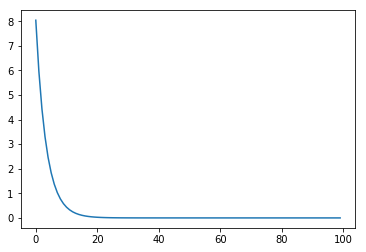

In [49]:
plt.plot(range(100), LOSSES)
plt.show()